### Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

### Reading data

In [143]:
df = pd.read_csv('netflix.csv')

In [144]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [145]:
df.shape

(8807, 12)

In [146]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Notes:
    
    1. We can see thata there are multiple values seperated by commma in a column, we can unnest them into new rows. 
    2. We can fill filling values with 'unknown' name for categorical variables and 0 for continuous variables.

### Unnesting columns

In [147]:
df['director'] = df['director'].str.split(',' )
df['cast'] = df['cast'].str.split(', ')
df['country'] = df['country'].str.split(', ')
df['listed_in'] = df['listed_in'].str.split(', ')

In [148]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


In [149]:
df = df.explode('director')
df = df.explode('cast')
df = df.explode('country')
df = df.explode('listed_in')

In [150]:
df.shape

(201991, 12)

In [151]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


### filling missing values

In [152]:
df.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

#### Notes:

1. Number of missing (null) values in each column:

    i. show_id = 0
    
    ii. type = 0
    
    iii. title = 0
    
    iv. director = 50643
    
    v. cast = 2146
    
    vi. country = 11897
    
    vii. date_added = 158
    
    viii. release_year = 0
    
    ix. rating = 67
    
    x. duration = 3
    
    xi. listed_in = 0
    
    xii. description = 0
    
2. director, country, rating, duration attributes can be converted into categories (catagorical attribute). 

3. date, release_year can be converted into ordinal attributes. 

4. Using listed_in, we can identify genere of the TV show or movie.

5. Using description, we can covert them into corresponding embeddings. 

In [153]:
df['director'].fillna('Unknown Director', inplace = True)
df['cast'].fillna('Unknown Actor', inplace = True)
df['country'].fillna('Unknown Country', inplace = True)
df['rating'].fillna('Unknown rating', inplace = True)
df['date_added'].fillna('Unknown date_added', inplace = True)
df['duration'].fillna('Unknown duration', inplace = True)

In [154]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [155]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


### 1. Defining Problem Statement and Analysing basic metrics

Problem statement is to identify the type of the show, as we can see from the df['type'].value_counts(), there are only 2 types: Either a 
1. Movie or a 
2. TV show, so based on the other attributes, problem is to identify the type of the show to grow up the business.

### 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary 

In [156]:
df.shape

(201991, 12)

In [157]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

The original number of rows in the netflix data is 8807 and number of columns is 12. 

After unnesting columns, number of rows are 201991, no.of columns = 12.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      201991 non-null  object
 4   cast          201991 non-null  object
 5   country       201991 non-null  object
 6   date_added    201991 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201991 non-null  object
 9   duration      201991 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [159]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [160]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 3. Non-Graphical Analysis: Value counts and unique attributes


### printing value counts, unique attributes, number of unique attributes in each column

#### Col: Type

In [161]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [162]:
df['type'].value_counts()

Movie      145843
TV Show     56148
Name: type, dtype: int64

In [163]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [164]:
len(df['type'].unique())

2

#### col: director

In [165]:
df['director'].value_counts()

Unknown Director         50643
Martin Scorsese            419
Youssef Chahine            409
Cathy Garcia-Molina        356
Steven Spielberg           355
                         ...  
Susannah Heath-Eves          1
 Jacqueline Monetta          1
Aziz Ansari                  1
Maz Jobrani                  1
José Miguel Contreras        1
Name: director, Length: 5121, dtype: int64

In [166]:
df['director'].unique()

array(['Kirsten Johnson', 'Unknown Director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [167]:
len(df['director'].unique())

5121

#### col: cast

In [168]:
df['cast'].value_counts()

Unknown Actor                         2146
Liam Neeson                            161
Alfred Molina                          160
John Krasinski                         139
Salma Hayek                            130
                                      ... 
Evan Michael Lee                         1
Christiane Seidel                        1
Al Vicente                               1
Pablo Gama Iturrarán “Mago Gamini”       1
William Lee Scott                        1
Name: cast, Length: 36440, dtype: int64

In [169]:
df['cast'].unique()

array(['Unknown Actor', 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

In [170]:
len(df['cast'].unique())

36440

#### col: country

In [171]:
df['country'].value_counts()

United States      59349
India              22814
United Kingdom     12945
Unknown Country    11897
Japan               8679
                   ...  
Afghanistan            2
Nicaragua              1
Uganda                 1
Kazakhstan             1
United States,         1
Name: country, Length: 128, dtype: int64

In [172]:
df['country'].unique()

array(['United States', 'South Africa', 'Unknown Country', 'India',
       'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Sene

In [173]:
len(df['country'].unique())

128

#### col: date_added

In [174]:
df['date_added'].value_counts()

January 1, 2020      3730
November 1, 2019     2229
July 1, 2021         2219
October 1, 2017      1899
September 1, 2021    1756
                     ... 
May 9, 2017             1
January 18, 2017        1
January 24, 2017        1
May 5, 2020             1
December 17, 2019       1
Name: date_added, Length: 1768, dtype: int64

In [175]:
df['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [176]:
len(df['date_added'].unique())

1768

#### col: release_year

In [177]:
df['release_year'].value_counts()

2018    24414
2019    21931
2017    20516
2020    19679
2016    18465
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

In [178]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [179]:
len(df['release_year'].unique())

74

#### col: rating

In [180]:
df['rating'].value_counts()

TV-MA             73867
TV-14             43931
R                 25860
PG-13             16246
TV-PG             14926
PG                10919
TV-Y7              6304
TV-Y               3665
TV-G               2779
NR                 1573
G                  1530
NC-17               149
TV-Y7-FV             86
UR                   86
Unknown rating       67
66 min                1
74 min                1
84 min                1
Name: rating, dtype: int64

In [181]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unknown rating', 'TV-Y7-FV', 'UR'], dtype=object)

In [182]:
len(df['rating'].unique())

18

#### col: duration

In [183]:
df['duration'].value_counts()

1 Season            35035
2 Seasons            9559
3 Seasons            5084
94 min               4343
106 min              4040
                    ...  
5 min                   3
Unknown duration        3
11 min                  2
9 min                   2
8 min                   2
Name: duration, Length: 221, dtype: int64

In [184]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [185]:
len(df['duration'].unique())

221

#### col: listed_in

In [186]:
df['listed_in'].value_counts()

Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

In [187]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [188]:
len(df['listed_in'].unique())

42

### 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

### Univariate Analysis

#### country

In [189]:
country_share = df['country'].value_counts()/len(df)* 100
country_share

United States      29.382002
India              11.294563
United Kingdom      6.408701
Unknown Country     5.889866
Japan               4.296726
                     ...    
Afghanistan         0.000990
Nicaragua           0.000495
Uganda              0.000495
Kazakhstan          0.000495
United States,      0.000495
Name: country, Length: 128, dtype: float64

#### Top 10 countries contributing shows

In [190]:
country_share.head(10)

United States      29.382002
India              11.294563
United Kingdom      6.408701
Unknown Country     5.889866
Japan               4.296726
France              4.086321
Canada              3.918491
Spain               2.631305
South Korea         2.496646
Germany             2.169899
Name: country, dtype: float64

#### Notes:

1. There are 128 different countries.
2. Top movies/shows are from US, IN, UK, JP and Fr.

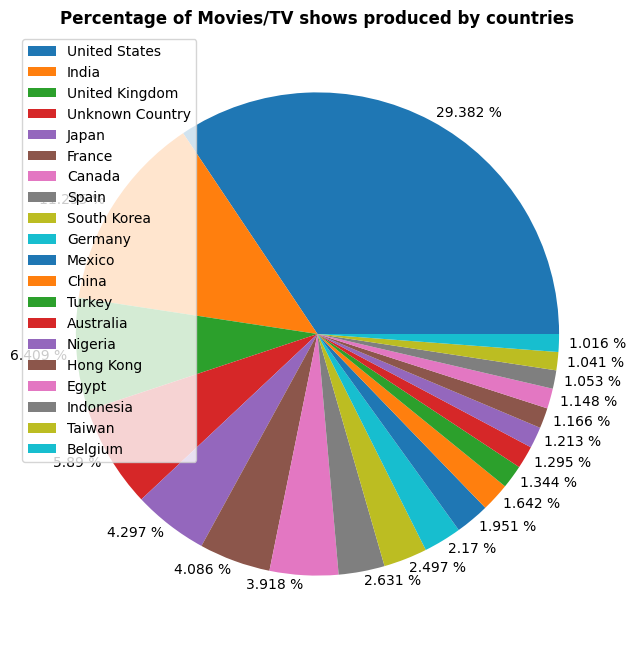

In [191]:
country_share = country_share[country_share>=1]
labels = country_share.round(3).astype("str") + " %"
fig1, ax = plt.subplots(figsize=(8, 8), dpi = 100)
ax.pie(
    country_share,
    labels=labels,
    labeldistance=1.04
)
plt.title(
    "Percentage of Movies/TV shows produced by countries",
    fontsize=12,
    fontweight="bold",
)
plt.legend(labels=country_share.index)
plt.show()

In [192]:
country_share_df = pd.DataFrame({'country': country_share.index, 'share %': country_share.values})

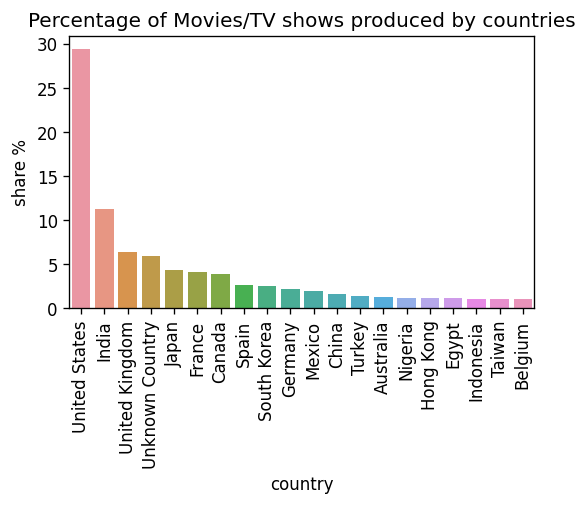

In [193]:
plt.figure(figsize = (5,3), dpi = 120)
sns.barplot(x = 'country', y = 'share %', data = country_share_df)
plt.title('Percentage of Movies/TV shows produced by countries')
plt.xticks(rotation=90)
plt.show()

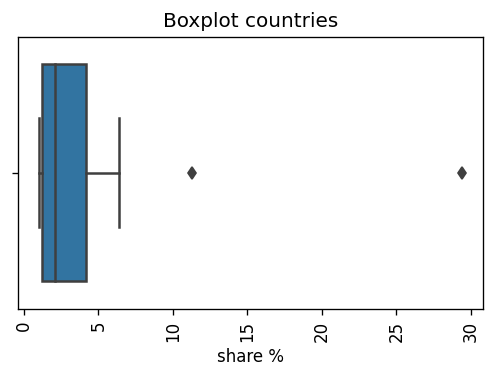

In [194]:
plt.figure(figsize = (5,3), dpi = 120)
sns.boxplot(country_share_df['share %'])
plt.title('Boxplot countries')
plt.xticks(rotation=90)
plt.show()

#### director

In [195]:
director_share = df['director'].value_counts()/len(df)* 100
director_share

Unknown Director         25.071909
Martin Scorsese           0.207435
Youssef Chahine           0.202484
Cathy Garcia-Molina       0.176245
Steven Spielberg          0.175750
                           ...    
Susannah Heath-Eves       0.000495
 Jacqueline Monetta       0.000495
Aziz Ansari               0.000495
Maz Jobrani               0.000495
José Miguel Contreras     0.000495
Name: director, Length: 5121, dtype: float64

#### Top 10 director directing shows

In [202]:
director_share.head(10)

Unknown Director       25.071909
Martin Scorsese         0.207435
Youssef Chahine         0.202484
Cathy Garcia-Molina     0.176245
Steven Spielberg        0.175750
Lars von Trier          0.166344
Raja Gosnell            0.152482
Tom Hooper              0.151492
McG                     0.145056
David Dhawan            0.133669
Name: director, dtype: float64

#### Notes: 

1. There are 5121 different directors.
2. Some of the top contributing directors are: Martin Scorsese, Youssef Chahine, Cathy Garcia-Molina, Steven Spielberg and Lars von Trier. 

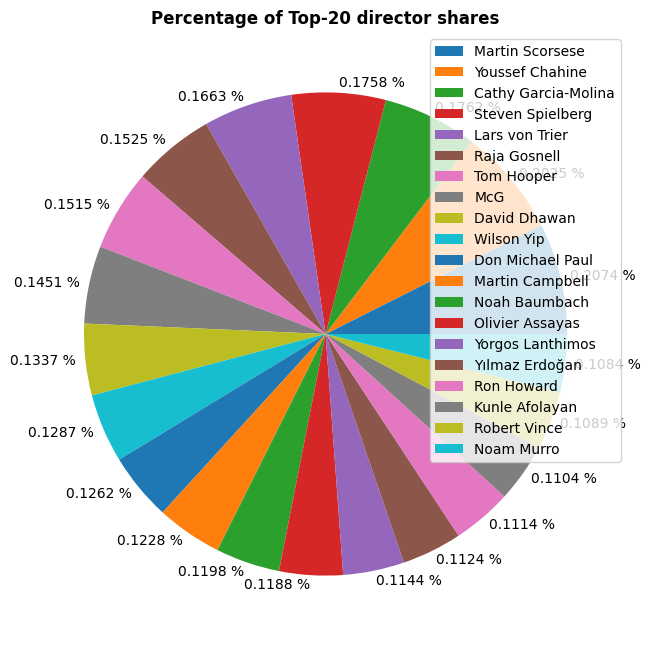

In [203]:
labels = director_share[1:21].round(4).astype("str") + " %"
fig1, ax = plt.subplots(figsize=(8, 8), dpi = 100)
ax.pie(
    director_share[1:21],
    labels=labels,
    labeldistance=1.04
)
plt.title(
    "Percentage of Top-20 director shares",
    fontsize=12,
    fontweight="bold",
)
plt.legend(labels=director_share[1:21].index)
plt.show()

In [204]:
director_share_df = pd.DataFrame({'director': director_share[1:21].index, 'share %': director_share[1:21].values})

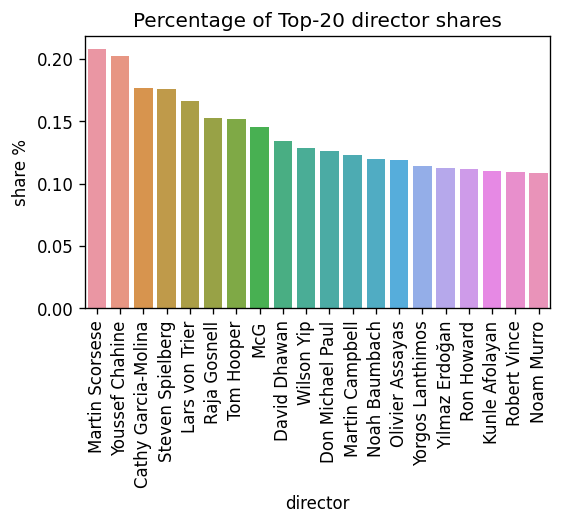

In [205]:
plt.figure(figsize = (5,3), dpi = 120)
sns.barplot(x = 'director', y = 'share %', data = director_share_df)
plt.title('Percentage of Top-20 director shares')
plt.xticks(rotation=90)
plt.show()

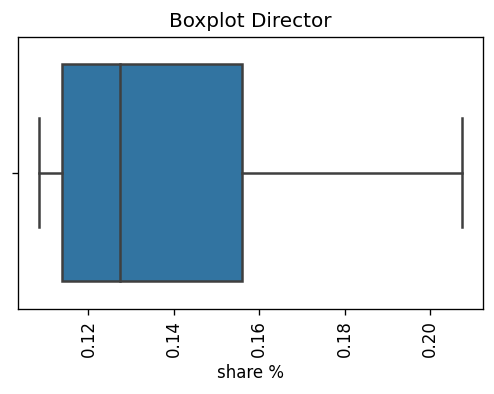

In [206]:
plt.figure(figsize = (5,3), dpi = 120)
sns.boxplot(director_share_df['share %'])
plt.title('Boxplot Director')
plt.xticks(rotation=90)
plt.show()

#### type

In [207]:
df['type'].value_counts()

Movie      145843
TV Show     56148
Name: type, dtype: int64

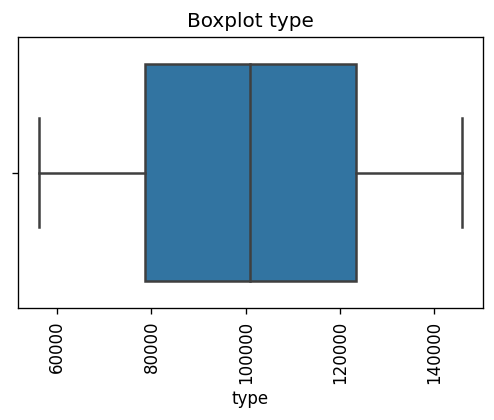

In [208]:
plt.figure(figsize = (5,3), dpi = 120)
sns.boxplot(x = df['type'].value_counts())
plt.title('Boxplot type')
plt.xticks(rotation=90)
plt.show()

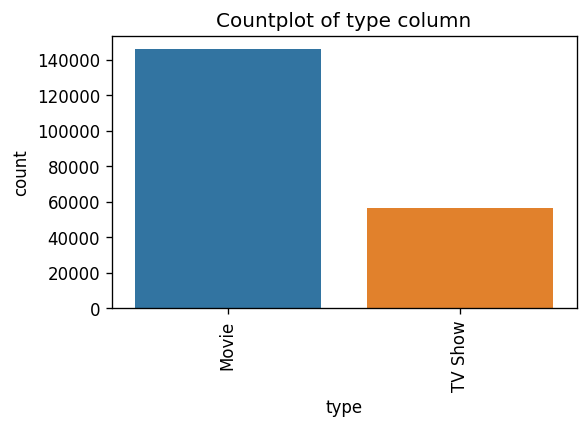

In [212]:
plt.figure(figsize = (5,3), dpi = 120)
sns.countplot(x = df['type'])
plt.title('Countplot of type column')
plt.xticks(rotation=90)
plt.show()

#### rating

In [213]:
df['rating'].value_counts()

TV-MA             73867
TV-14             43931
R                 25860
PG-13             16246
TV-PG             14926
PG                10919
TV-Y7              6304
TV-Y               3665
TV-G               2779
NR                 1573
G                  1530
NC-17               149
TV-Y7-FV             86
UR                   86
Unknown rating       67
66 min                1
74 min                1
84 min                1
Name: rating, dtype: int64

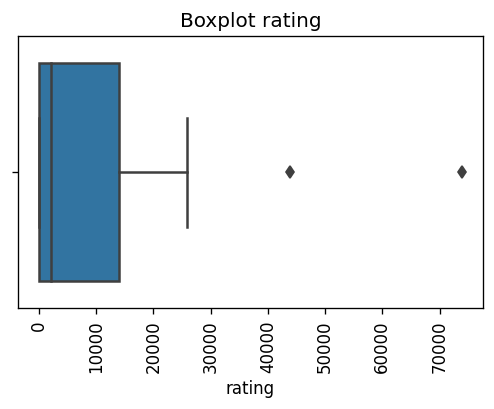

In [214]:
plt.figure(figsize = (5,3), dpi = 120)
sns.boxplot(x = df['rating'].value_counts())
plt.title('Boxplot rating')
plt.xticks(rotation=90)
plt.show()

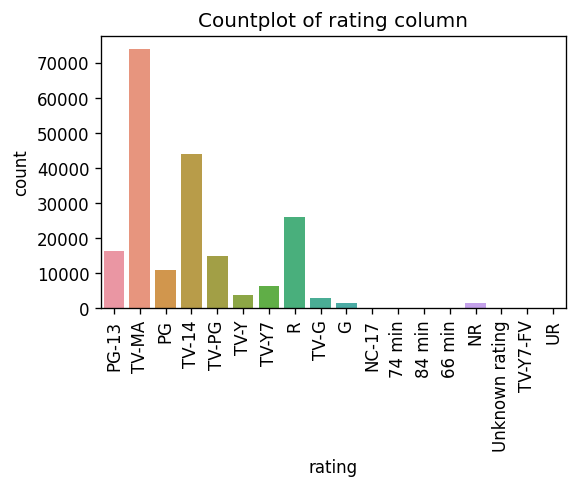

In [215]:
plt.figure(figsize = (5,3), dpi = 120)
sns.countplot(x = df['rating'])
plt.title('Countplot of rating column')
plt.xticks(rotation=90)
plt.show()

#### duration

In [216]:
df['duration'].value_counts()

1 Season            35035
2 Seasons            9559
3 Seasons            5084
94 min               4343
106 min              4040
                    ...  
5 min                   3
Unknown duration        3
11 min                  2
9 min                   2
8 min                   2
Name: duration, Length: 221, dtype: int64

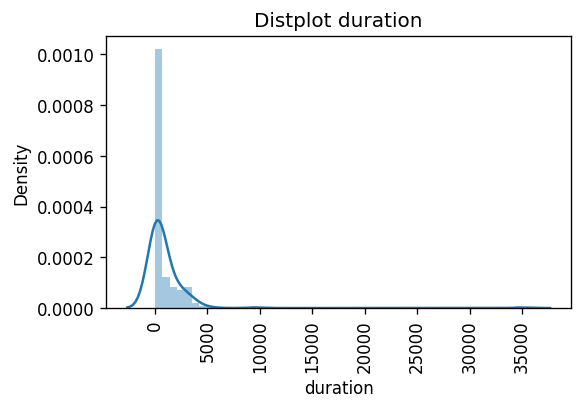

In [218]:
plt.figure(figsize = (5,3), dpi = 120)
sns.distplot(x = df['duration'].value_counts())
plt.title('Distplot duration')
plt.xlabel('duration')
plt.xticks(rotation=90)
plt.show()

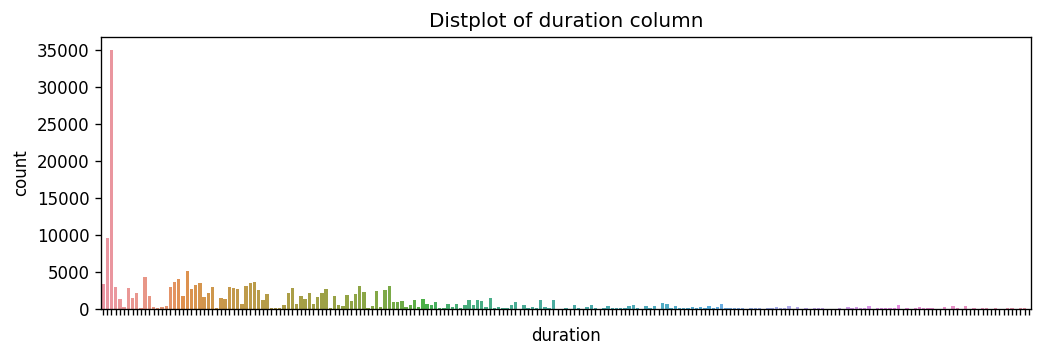

In [222]:
plt.figure(figsize = (10,3), dpi = 120)
g = sns.countplot(df['duration'])
plt.title('Distplot of duration column')
plt.xlabel('duration')
g.set(xticklabels = [])
plt.xticks(rotation=45)
plt.show()

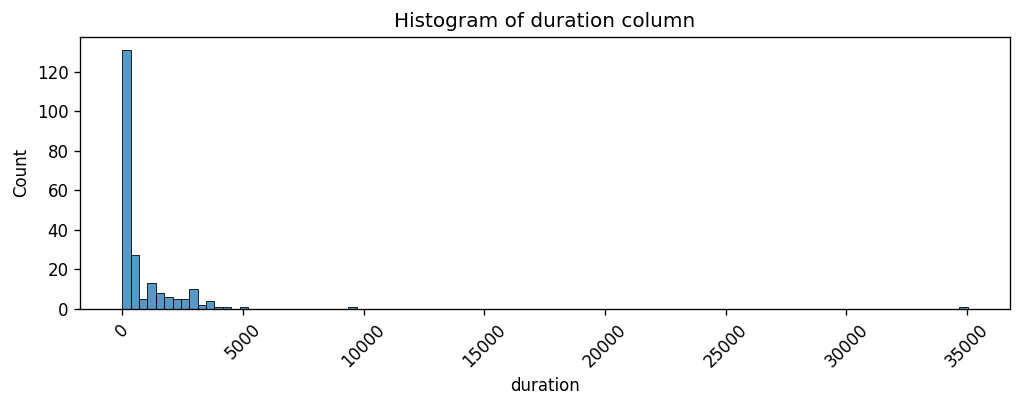

In [223]:
plt.figure(figsize = (10,3), dpi = 120)
sns.histplot(df['duration'].value_counts())
plt.title('Histogram of duration column')
plt.xlabel('duration')
plt.xticks(rotation=45)
plt.show()

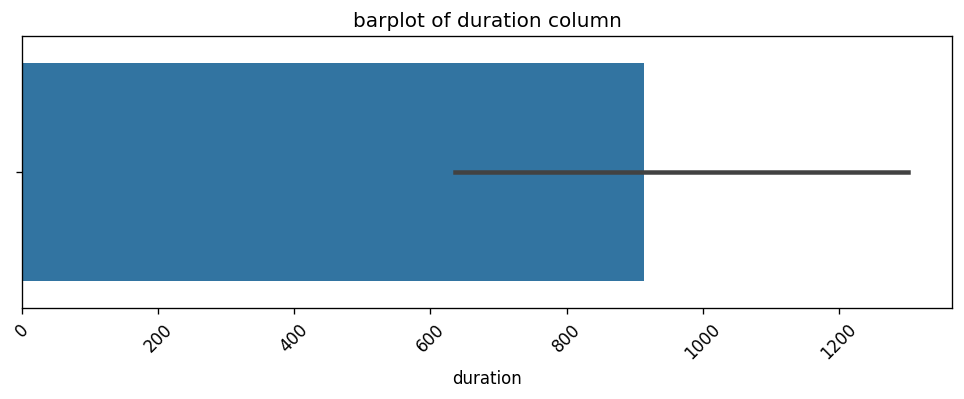

In [226]:
plt.figure(figsize = (10,3), dpi = 120)
sns.barplot(df['duration'].value_counts())
plt.title('barplot of duration column')
plt.xlabel('duration')
plt.xticks(rotation=45)
plt.show()

#### release_year

In [227]:
df['release_year'].value_counts()

2018    24414
2019    21931
2017    20516
2020    19679
2016    18465
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

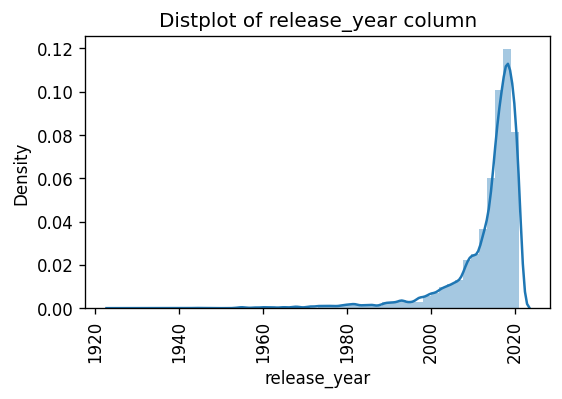

In [230]:
plt.figure(figsize = (5,3), dpi = 120)
sns.distplot(x = df['release_year'])
plt.title('Distplot of release_year column')
plt.xlabel('release_year')
plt.xticks(rotation=90)
plt.show()

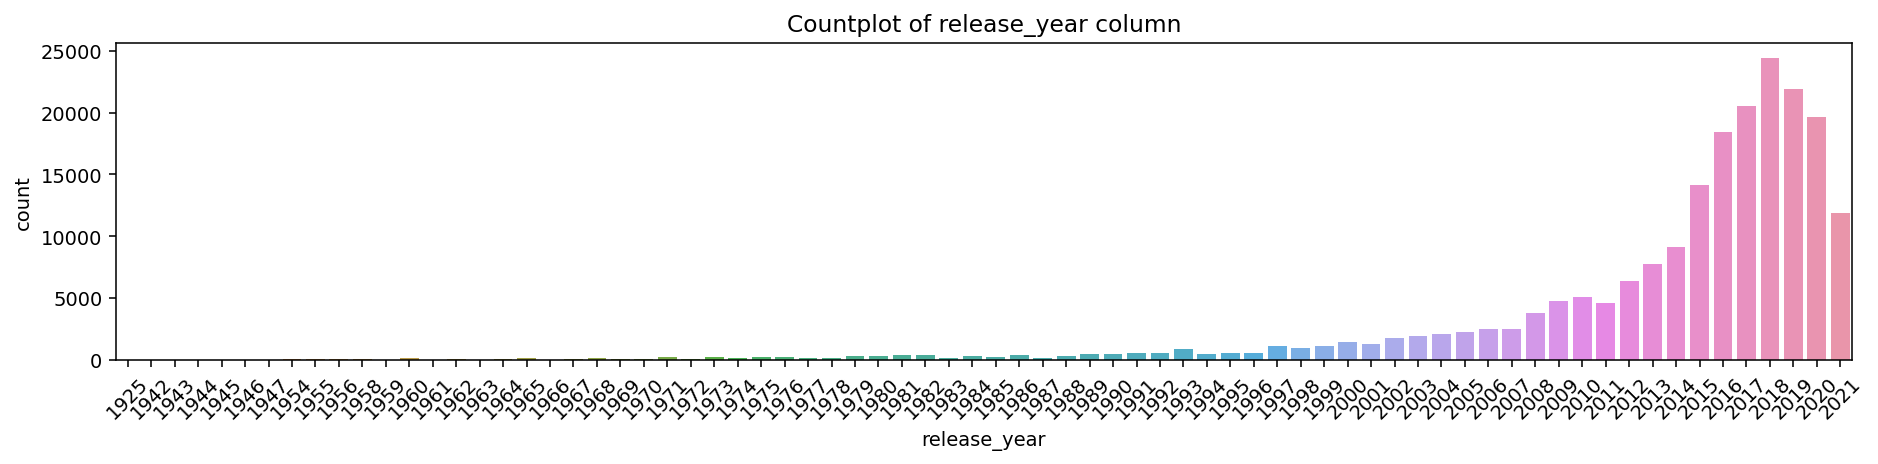

In [229]:
plt.figure(figsize = (16,3), dpi = 140)
sns.countplot(x = df['release_year'])
plt.title('Countplot of release_year column')
plt.xlabel('release_year')
plt.xticks(rotation=45)
plt.show()

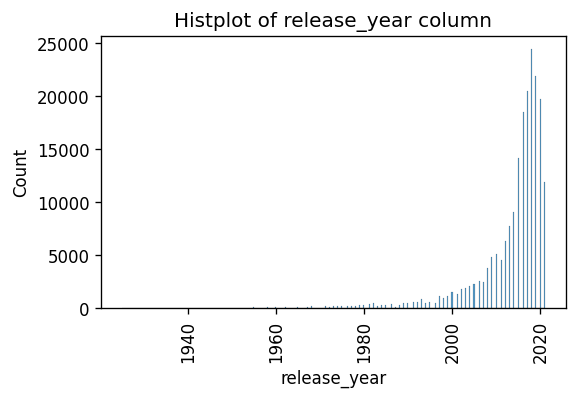

In [231]:
plt.figure(figsize = (5,3), dpi = 120)
sns.histplot(x = df['release_year'])
plt.title('Histplot of release_year column')
plt.xlabel('release_year')
plt.xticks(rotation=90)
plt.show()

#### date_added

In [233]:
df['date_added'].value_counts()

January 1, 2020      3730
November 1, 2019     2229
July 1, 2021         2219
October 1, 2017      1899
September 1, 2021    1756
                     ... 
May 9, 2017             1
January 18, 2017        1
January 24, 2017        1
May 5, 2020             1
December 17, 2019       1
Name: date_added, Length: 1768, dtype: int64

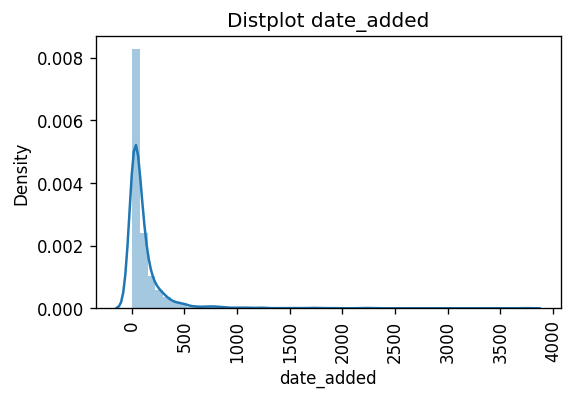

In [237]:
plt.figure(figsize = (5,3), dpi = 120)
sns.distplot(x = df['date_added'].value_counts())
plt.title('Distplot date_added')
plt.xlabel('date_added')
plt.xticks(rotation=90)
plt.show()

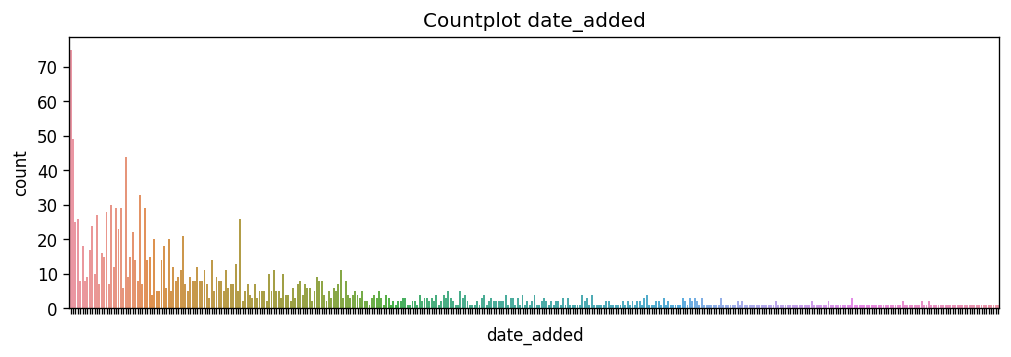

In [240]:
plt.figure(figsize = (10,3), dpi = 120)
g = sns.countplot(x = df['date_added'].value_counts())
plt.title('Countplot date_added')
plt.xlabel('date_added')
g.set(xticklabels = [])
plt.xticks(rotation=90)
plt.show()

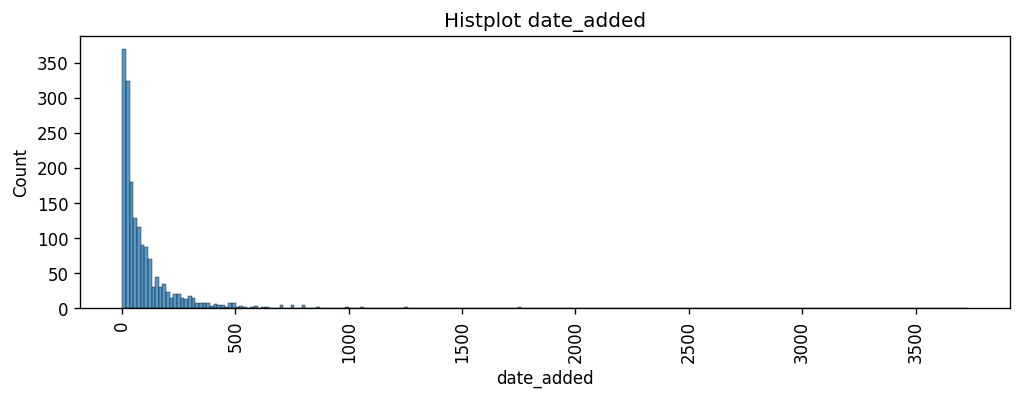

In [241]:
plt.figure(figsize = (10,3), dpi = 120)
sns.histplot(x = df['date_added'].value_counts())
plt.title('Histplot date_added')
plt.xlabel('date_added')
plt.xticks(rotation=90)
plt.show()

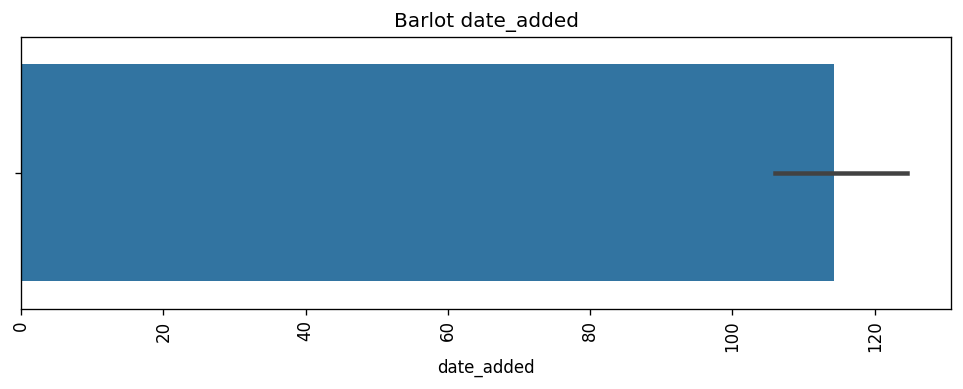

In [242]:
plt.figure(figsize = (10,3), dpi = 120)
sns.barplot(x = df['date_added'].value_counts())
plt.title('Barlot date_added')
plt.xlabel('date_added')
plt.xticks(rotation=90)
plt.show()

#### cast

In [243]:
df['cast'].value_counts()

Unknown Actor                         2146
Liam Neeson                            161
Alfred Molina                          160
John Krasinski                         139
Salma Hayek                            130
                                      ... 
Evan Michael Lee                         1
Christiane Seidel                        1
Al Vicente                               1
Pablo Gama Iturrarán “Mago Gamini”       1
William Lee Scott                        1
Name: cast, Length: 36440, dtype: int64

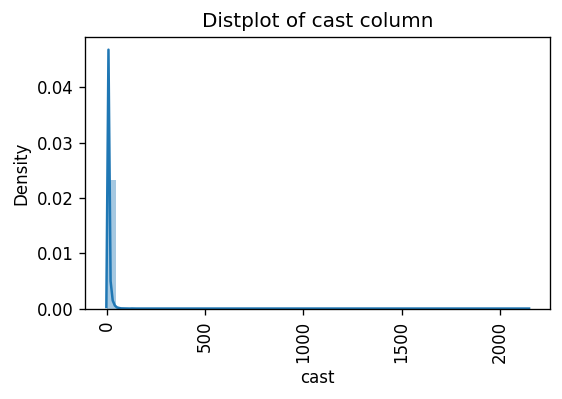

In [246]:
plt.figure(figsize = (5,3), dpi = 120)
sns.distplot(x = df['cast'][1:].value_counts())
plt.title('Distplot of cast column')
plt.xlabel('cast')
plt.xticks(rotation=90)
plt.show()

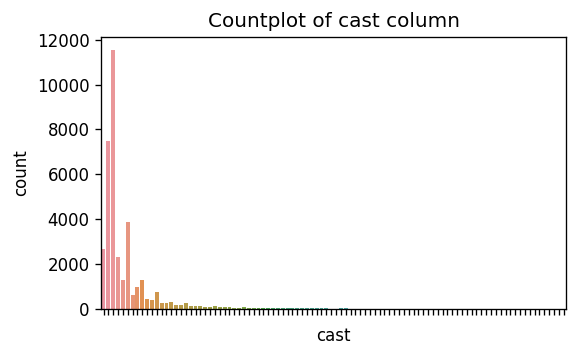

In [248]:
plt.figure(figsize = (5,3), dpi = 120)
g = sns.countplot(x = df['cast'][1:].value_counts())
plt.title('Countplot of cast column')
plt.xlabel('cast')
g.set(xticklabels = [])
plt.xticks(rotation=90)
plt.show()

#### listed_in

In [441]:
df[df['type']=='Movie']['listed_in'].value_counts()

Dramas                      29775
International Movies        28211
Comedies                    20829
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
Thrillers                    7107
Romantic Movies              6412
Horror Movies                4571
Sci-Fi & Fantasy             4037
Music & Musicals             3077
Documentaries                2407
Sports Movies                1531
Classic Movies               1434
Cult Movies                  1077
Anime Features               1045
LGBTQ Movies                  838
Faith & Spirituality          719
Stand-Up Comedy               540
Movies                        412
Name: listed_in, dtype: int64

In [442]:
df[df['type']=='TV Show']['listed_in'].value_counts()

International TV Shows          12837
TV Dramas                        8933
TV Comedies                      4914
Crime TV Shows                   4715
Kids' TV                         4562
Romantic TV Shows                3049
Anime Series                     2295
TV Action & Adventure            2278
Spanish-Language TV Shows        2118
British TV Shows                 1799
TV Mysteries                     1281
Korean TV Shows                  1122
TV Sci-Fi & Fantasy              1035
TV Horror                         941
Docuseries                        844
TV Thrillers                      768
Teen TV Shows                     742
Reality TV                        735
TV Shows                          337
Stand-Up Comedy & Talk Shows      268
Classic & Cult TV                 260
Science & Nature TV               157
Name: listed_in, dtype: int64

In [427]:
df['listed_in'].value_counts()

Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12837
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8933
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4914
Crime TV Shows                   4715
Horror Movies                    4571
Kids' TV                         4562
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2295
TV Action & Adventure            2278
Spanish-Language TV Shows        2118
British TV Shows                 1799
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

In [252]:
len(df['listed_in'].unique())

42

#### Notes:

1. There are 42 different generes out of 8807 movies/shows.
2. Top generes are from Dramas, International movies, Comedies, International TV shows and Action & Adventure. 

#### Which genre movies are more popular or produced more

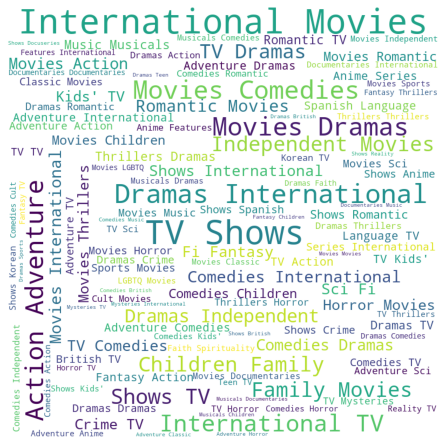

In [255]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(df['listed_in']))

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

From the wordcloud also, we can see

1. TV Dramas, Thrillers Dramas, International Dramas are popular. 
2. International Movies, Drama Movies, Family Movies, Action Movies are popular. 

<Figure size 2400x1200 with 0 Axes>

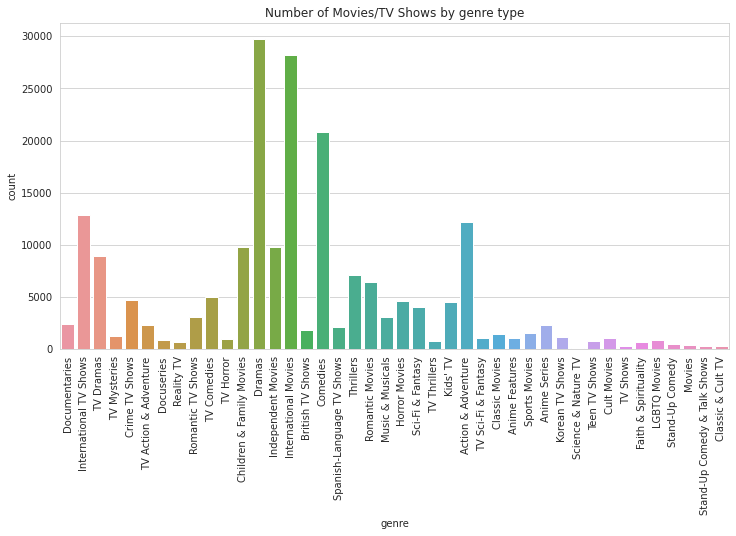

In [263]:
plt.figure(figsize = (12,6), dpi = 200)
plt.figure(figsize=(12, 6))
sns.countplot(df['listed_in'])
plt.xticks(rotation=90)
plt.title('Number of Movies/TV Shows by genre type')
plt.xlabel('genre')
plt.ylabel('count')
plt.show()

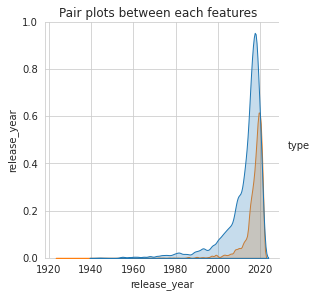

In [265]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='type', height=4)
plt.suptitle('Pair plots between each features',y=1.01)
plt.show()

#### 5. Missing Value & Outlier check

1. Number of missing values and filling missing values is already done above. 

In [285]:
df['rating'].value_counts()

TV-MA             73867
TV-14             43931
R                 25860
PG-13             16246
TV-PG             14926
PG                10919
TV-Y7              6304
TV-Y               3665
TV-G               2779
NR                 1573
G                  1530
NC-17               149
TV-Y7-FV             86
UR                   86
Unknown rating       67
66 min                1
74 min                1
84 min                1
Name: rating, dtype: int64

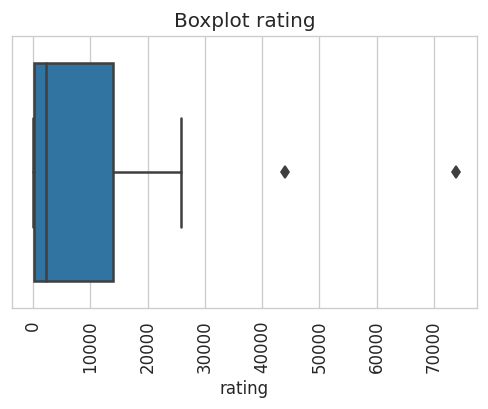

In [290]:
plt.figure(figsize = (5,3), dpi = 120)
sns.boxplot(x = df['rating'].value_counts())
plt.title('Boxplot rating')
plt.xticks(rotation=90)
plt.show()

We can witness 2 outliers in rating column.

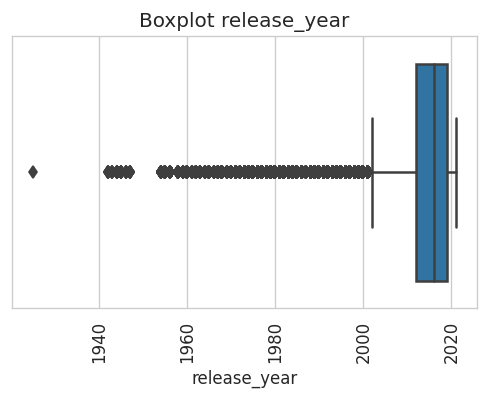

In [288]:
plt.figure(figsize = (5,3), dpi = 120)
sns.boxplot(x = df['release_year'])
plt.title('Boxplot release_year')
plt.xticks(rotation=90)
plt.show()

We can witness outliers before 2002 in release_year column.

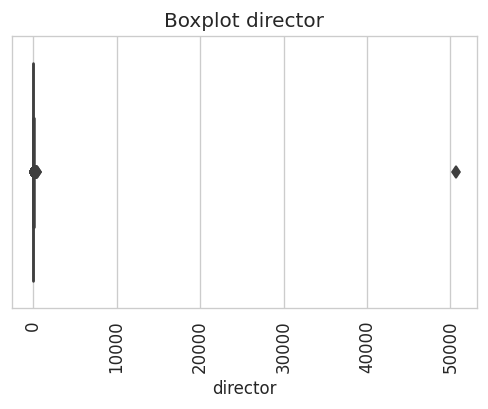

In [295]:
plt.figure(figsize = (5,3), dpi = 120)
sns.boxplot(x = df['director'].value_counts())
plt.title('Boxplot director')
plt.xticks(rotation=90)
plt.show()

We can witness 1 outlier in director column which may be due to unknowns. 

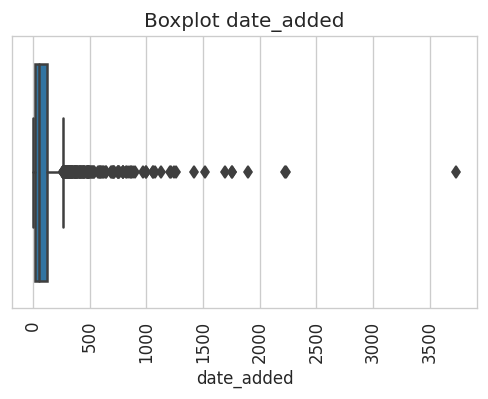

In [296]:
plt.figure(figsize = (5,3), dpi = 120)
sns.boxplot(x = df['date_added'].value_counts())
plt.title('Boxplot date_added')
plt.xticks(rotation=90)
plt.show()

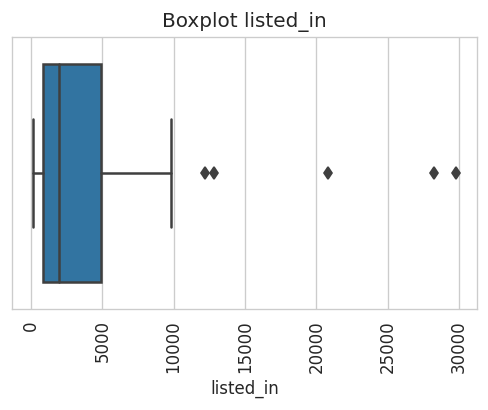

In [304]:
plt.figure(figsize = (5,3), dpi = 120)
sns.boxplot(x = df['listed_in'].value_counts())
plt.title('Boxplot listed_in')
plt.xticks(rotation=90)
plt.show()

We can see 5 outliers in listed_in column. 

### 6. Insights based on Non-Graphical and Visual Analysis 

In [301]:
df.describe()

,release_year
count,201991.000000
mean,2013.452891
std,9.003933
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [303]:
df[['type', 'director', 'cast', 'listed_in', 'date_added', 'title', 'country', 'rating', 'duration']].describe()

,type,director,cast,listed_in,date_added,title,country,rating,duration
count,201991,201991,201991,201991,201991,201991,201991,201991,201991
unique,2,5121,36440,42,1768,8807,128,18,221
top,Movie,Unknown Director,Unknown Actor,Dramas,"January 1, 2020",Kahlil Gibran's The Prophet,United States,TV-MA,1 Season
freq,145843,50643,2146,29775,3730,700,59349,73867,35035


Other insights are already pointed out while plotting graphs. 

### 7. Business Insights 

### Comparison of tv shows vs. movies

#### Number of movies produced in each country and pick the top 10 countries:

In [315]:
df1 = df[df['type'] == 'Movie']
df2 = df[df['type'] == 'TV Show']

In [319]:
df1['country'].value_counts().head(10)

United States      45816
India              21411
United Kingdom      8560
France              6607
Unknown Country     6199
Canada              5738
Japan               3525
Spain               3469
Germany             3427
China               2377
Name: country, dtype: int64

United States                    31.4 %
India                            14.7 %
United Kingdom     5.8999999999999995 %
France                            4.5 %
Unknown Country                   4.3 %
Canada                            3.9 %
Japan                             2.4 %
Spain                             2.4 %
Germany                           2.3 %
China                             1.6 %
Name: country, dtype: object


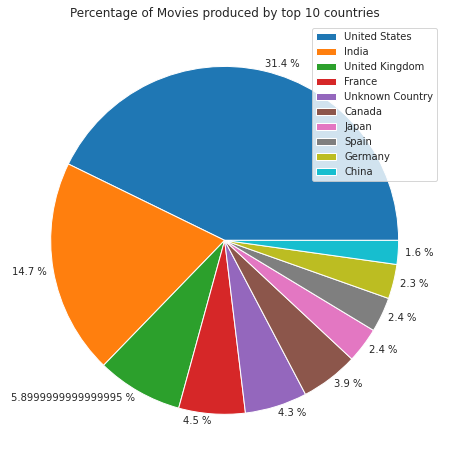

In [342]:
labels = ((df1['country'].value_counts().head(10)/len(df1)).round(3)*100).astype("str") + " %"
print(labels)
fig1, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    df1['country'].value_counts().head(10),
    labels=labels,
    labeldistance=1.04
)
plt.title('Percentage of Movies produced by top 10 countries')
plt.legend(labels=df1['country'].value_counts().head(10).index)
plt.show()

#### Number of Tv-Shows produced in each country and pick the top 10 countries:

In [320]:
df2['country'].value_counts().head(10)

United States      13533
Unknown Country     5698
Japan               5154
United Kingdom      4385
South Korea         3754
Canada              2177
Mexico              2018
Spain               1846
Taiwan              1719
France              1647
Name: country, dtype: int64

United States                     9.3 %
Unknown Country                   3.9 %
Japan              3.5000000000000004 %
United Kingdom                    3.0 %
South Korea                       2.6 %
Canada                            1.5 %
Mexico             1.4000000000000001 %
Spain                             1.3 %
Taiwan                            1.2 %
France             1.0999999999999999 %
Name: country, dtype: object


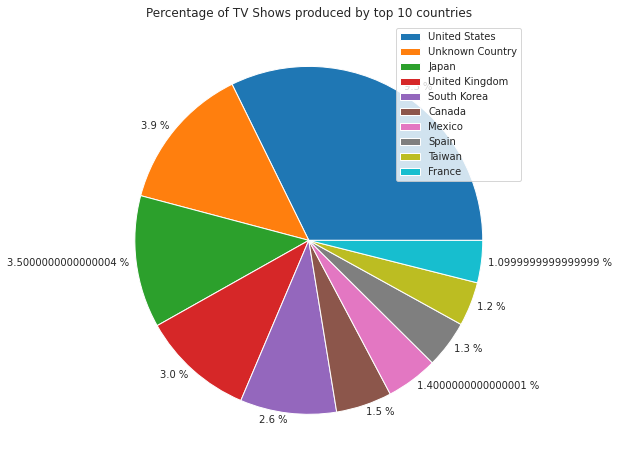

In [341]:
labels = ((df2['country'].value_counts().head(10)/len(df1)).round(3)*100).astype("str") + " %"
print(labels)
fig1, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    df2['country'].value_counts().head(10),
    labels=labels,
    labeldistance=1.04
)
plt.title('Percentage of TV Shows produced by top 10 countries')
plt.legend(labels=df2['country'].value_counts().head(10).index)
plt.show()

### Best time to launch a TV show or a movie:

In [387]:
df = df[(df['date_added'] != 'Unknown date_added') & (df['date_added'] != '')]

In [389]:
list(df['date_added'].unique())

['September 25, 2021',
 'September 24, 2021',
 'September 23, 2021',
 'September 22, 2021',
 'September 21, 2021',
 'September 20, 2021',
 'September 19, 2021',
 'September 17, 2021',
 'September 16, 2021',
 'September 15, 2021',
 'September 14, 2021',
 'September 11, 2021',
 'September 10, 2021',
 'September 9, 2021',
 'September 8, 2021',
 'September 7, 2021',
 'September 6, 2021',
 'September 5, 2021',
 'September 4, 2021',
 'September 3, 2021',
 'September 2, 2021',
 'September 1, 2021',
 'August 31, 2021',
 'August 29, 2021',
 'August 28, 2021',
 'August 27, 2021',
 'August 26, 2021',
 'August 25, 2021',
 'August 24, 2021',
 'August 23, 2021',
 'August 21, 2021',
 'August 20, 2021',
 'August 19, 2021',
 'August 18, 2021',
 'August 16, 2021',
 'August 15, 2021',
 'August 13, 2021',
 'August 12, 2021',
 'August 11, 2021',
 'August 10, 2021',
 'August 9, 2021',
 'August 8, 2021',
 'August 7, 2021',
 'August 6, 2021',
 'August 5, 2021',
 'August 4, 2021',
 'August 3, 2021',
 'August 1

In [398]:
def date_convert(row):
    row = row['date_added']
    row = row.strip().split(' ')
    dict = {'September': '09', 'August': '08', 'July': '07', 'June': '06', 'May': '05', 'April': '04', 'March': '03', \
            'February': '02', 'January': '01', 'December': '12', 'November': '11', 'October': '10'}
    mm = dict[row[0]]
    dd = str(row[1].split(',')[0])
    yy = str(row[2])
    date = yy+'-'+mm+'-'+dd
    return date

In [399]:
df['date_added_formatted'] = df.apply(date_convert, axis = 1)

In [400]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_formatted
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24


In [401]:
df['date_added_formatted'] = pd.to_datetime(df['date_added_formatted'])

In [402]:
df['week_number'] = df['date_added_formatted'].dt.week
df['month_number'] = df['date_added_formatted'].dt.month

In [403]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_formatted,week_number,month_number
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,9
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9


#### Top 10 weeks to release Movie

In [416]:
df[df['type'] == 'Movie'].groupby(['week_number', 'type'])['type'].count().sort_values(ascending = False).head(10)

week_number  type 
1            Movie    8456
44           Movie    5563
9            Movie    5094
35           Movie    5048
26           Movie    4931
40           Movie    4878
31           Movie    4388
27           Movie    3808
48           Movie    3737
18           Movie    3686
Name: type, dtype: int64

#### Top 10 weeks to release TV Show

In [417]:
df[df['type'] == 'TV Show'].groupby(['week_number', 'type'])['type'].count().sort_values(ascending = False).head(10)

week_number  type   
27           TV Show    1977
35           TV Show    1945
24           TV Show    1702
26           TV Show    1662
31           TV Show    1646
13           TV Show    1554
48           TV Show    1513
5            TV Show    1386
44           TV Show    1380
18           TV Show    1364
Name: type, dtype: int64

#### Top 5 months to release Movie

In [420]:
df[df['type'] == 'Movie'].groupby(['month_number', 'type'])['type'].count().sort_values(ascending = False).head(10)

month_number  type 
7             Movie    15049
1             Movie    13947
10            Movie    13514
9             Movie    13219
12            Movie    12768
4             Movie    12538
8             Movie    11924
6             Movie    11616
3             Movie    11489
11            Movie    11063
Name: type, dtype: int64

#### Top 5 months to release TV Show

In [421]:
df[df['type'] == 'TV Show'].groupby(['month_number', 'type'])['type'].count().sort_values(ascending = False).head(10)

month_number  type   
12            TV Show    5498
7             TV Show    5227
8             TV Show    5162
6             TV Show    5043
9             TV Show    4900
4             TV Show    4543
11            TV Show    4532
3             TV Show    4352
1             TV Show    4307
10            TV Show    4255
Name: type, dtype: int64

### Analysis of actors/directors of different types of shows/movies:

#### Top 10 actors who have appeared in most Movies

In [423]:
df[df['type'] == 'Movie'].groupby(['cast', 'type'])['type'].count().sort_values(ascending = False).head(11)

cast               type 
Unknown Actor      Movie    1328
Liam Neeson        Movie     161
Alfred Molina      Movie     157
John Krasinski     Movie     138
Salma Hayek        Movie     130
Frank Langella     Movie     128
Anupam Kher        Movie     118
John Rhys-Davies   Movie     116
Shah Rukh Khan     Movie     108
Naseeruddin Shah   Movie     106
Quvenzhané Wallis  Movie     100
Name: type, dtype: int64

#### Top 10 actors who have appeared in most TV Shows

In [424]:
df[df['type'] == 'TV Show'].groupby(['cast', 'type'])['type'].count().sort_values(ascending = False).head(11)

cast                type   
Unknown Actor       TV Show    818
David Attenborough  TV Show     82
Takahiro Sakurai    TV Show     56
Yuki Kaji           TV Show     45
Ai Kayano           TV Show     41
Junichi Suwabe      TV Show     39
Daisuke Ono         TV Show     38
Yuichi Nakamura     TV Show     38
Jun Fukuyama        TV Show     38
Kate Harbour        TV Show     37
Joanna Kulig        TV Show     35
Name: type, dtype: int64

#### Top 10 directors who have appeared in most Movies

In [425]:
df[df['type'] == 'Movie'].groupby(['director', 'type'])['type'].count().sort_values(ascending = False).head(11)

director             type 
Unknown Director     Movie    1285
Martin Scorsese      Movie     419
Youssef Chahine      Movie     409
Cathy Garcia-Molina  Movie     356
Steven Spielberg     Movie     355
Lars von Trier       Movie     336
Raja Gosnell         Movie     308
Tom Hooper           Movie     306
McG                  Movie     293
David Dhawan         Movie     270
Wilson Yip           Movie     260
Name: type, dtype: int64

#### Top 10 directors who have appeared in most TV Shows

In [426]:
df[df['type'] == 'TV Show'].groupby(['director', 'type'])['type'].count().sort_values(ascending = False).head(11)

director          type   
Unknown Director  TV Show    49200
Noam Murro        TV Show      189
Thomas Astruc     TV Show      160
 Alan Poul        TV Show      104
Damien Chazelle   TV Show      104
 Laïla Marrakchi  TV Show      104
 Houda Benyamina  TV Show      104
Rob Seidenglanz   TV Show      103
Alejandro Lozano  TV Show       90
Jay Oliva         TV Show       81
Manolo Caro       TV Show       78
Name: type, dtype: int64

### Which genre movies are more popular or produced more

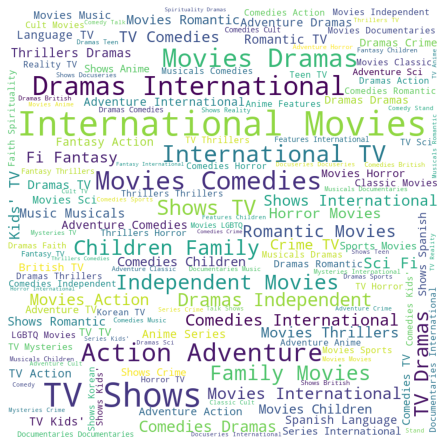

In [429]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(df['listed_in']))

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

From the wordcloud also, we can see

1. TV Dramas, Thrillers Dramas, International Dramas are popular. 
2. International Movies, Drama Movies, Family Movies, Action Movies are popular. 

### Find After how many days the movie will be added to Netflix after the release of the movie

Note:
    
    1. Since exact release date is not given in the dataset, To simplify, I have considered that movie is released on 01-01-release_year. 

In [435]:
df['days_to_add_in_netflix'] = (df['date_added_formatted'] - pd.to_datetime(df['release_year'].apply(lambda x: str(x)+'-01-01'))).dt.days

In [436]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_formatted,week_number,month_number,days_to_add_in_netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,9,633
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,266
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,266
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,266
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,266


In [438]:
df[df['type']=='Movie']['days_to_add_in_netflix'].mode()

0    1369
dtype: int64

In [439]:
df[df['type']=='TV Show']['days_to_add_in_netflix'].mode()

0    243
dtype: int64

In [440]:
df['days_to_add_in_netflix'].mode()

0    547
dtype: int64

Notes:
    
    1. After 1369 days, Movies will be added to Netflix. 
    2. After 243 days, TV Shows will be added to Netflix.
    3. After 547 days, Movies/TV Shows will be added to Netflix. 

### 8. Recommendations

Netflix Exploratory Data Analysis project provides great insights about different TV Shows and Movies.

1. Since total number of movies is around 70% while TV Shows are around 30%, directors prefers to create Movies more than TV Shows. 
2. Dramas, Actions, Comedies , Thrilers movies are most polular movies, recommendation for directors is to create such movies. 
3. Drama, Comedics, Crime, TV Shows are most popular TV Shows, recommendation for directors is to create such TV Shows.
4. The top-3 countries for movies are US, IN and UK while top-3 countries for TV Shows are US, JP and UK. It is more likely to create movies/TV Shows in top poular countries to be more successful. 
5. The number of movies on Netflix has increased significantly in recent years, with the 2018 being the top-most released year. 
6. TV-MA is the most popular rating on Netflix which suggests to build similar rating shows. 
7. Most TV shows has a duration of 1 season which suggest to build a single reason. 
8. Generally, after 547 days, Movies/TV Shows will be added to Netflix. 
9. Recommendation is to rease a movie in a 1st week and a TV show in a 27th week.
10. Recommendation is to rease a movie in a 7th month and a TV show in a 12th month.